# Q3. Bank Churn Classification Problem
## Dataset Description:
Banking is one of those traditional industries that has gone through a steady transformation over the past few decades. Yet, many banks today with a sizeable customer base are hoping to gain a competitive edge but have not tapped into the vast amounts of data they have, especially in solving one of the most acknowledged problems – customer churn (i.e., a customer leaving the bank). It is advantageous to banks to know what leads a client to leave the bank. Banks often use the customer churn rate as one of their key business metrics because the cost of retaining existing customers is far less than acquiring new ones, and meanwhile increasing customer retention can greatly increase profits.  
Churn prevention allows companies to develop different programs such as loyalty and retention programs to keep as many customers as possible. Following are the attributes of the dataset we will be working with. 
 

- RowNumber (continuous) — corresponds to the record (row) number and has no effect on the output. 
 

- CustomerId  (categorical)— contains random values and has no effect on customer leaving the bank. 
 

- Surname  (categorical)— the surname of a customer has no impact on their decision to leave the bank 
 

- CreditScore  (continuous) — can influence customer churn, since a customer with a higher credit score is less likely to leave the bank. 
 

- Geography (categorical) — a customer’s location can affect their decision to leave the bank. 
 

- Gender (categorical) — it’s interesting to explore whether gender plays a role in a customer leaving the bank. 
 

- Age (continuous) — this is certainly relevant, since older customers are less likely to leave their bank than younger ones. 
 

- Tenure (continuous) — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank. 
 

- Balance (continuous) — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances. 
 

- NumOfProducts (continuous) — refers to the number of products that a customer has purchased through the bank. 
 

- HasCrCard (categorical) — denotes whether a customer has a credit card. This column is also relevant since people with a credit card are less likely to leave the bank. 
 

- IsActiveMember (categorical) — active customers are less likely to leave the bank. 
 

- EstimatedSalary (continuous) — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. 
 

- Exited (Categorical) — whether or not the customer left the bank. (Target variable) 

# Import all the necessary libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Scaling & splitting Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Sampling library
from imblearn.over_sampling import SMOTE

#Evaluation Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <BankChurn.csv> as a pandas dataframe using the `pd.read_csv()` function which returns a dataframe , store this value in a variable named ‘df’.

In [2]:
df = pd.read_csv("churn.csv")
df.shape

(10000, 14)

2. The resulting dataframe should have the shape (10000,14) indicating that there are 10000 instances and 14 columns. 

3. In this dataframe, currently you have 9 features which are the following: RowNumber, CustomerID, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary. Using the ‘pandas.dataframe.drop’ function to drop the RowNumber, CustomerID and Surname columns.

In [3]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

4. Using the ‘pandas.isnull()’ function check if there are any missing values in the dataframe and report this value (i.e., the number of missing values per column of the dataframe).

In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

5. Your task is to use feature columns to predict the target column (which is categorical in our case). This can be cast as a classification problem. 

6. Create a dataframe X of features (by dropping the ‘Exited’ column from the original dataframe). Create a Pandas Series object of targets Y (by only considering the ‘Exited’ column from the original dataframe). Moving forward, we will be working with X and Y.

In [5]:
X = df.drop(['Exited'],axis=1)
Y = df['Exited']

### ii. Data Visualisation
1. Visualize the distribution of the ‘Age’ and ‘CreditScore’ column using the ‘matplotlib.pyplot.hist’ function as two separate plots. Label the x-axis and the y-axis along with giving the plot a title and assign a bin size of 7.

- What are the respective mean values of these two features (use the pandas.DataFrame.mean() function)?
- What is the respective standard deviation of these two features (use the pandas.DataFrame.std() function)? 

Text(0.5, 1.0, 'Histogram for Age Column')

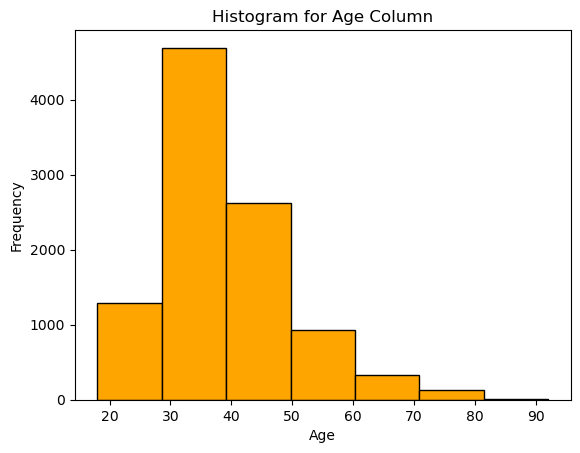

In [6]:
data_age = df['Age']
data_cs = df['CreditScore']
plt.hist(data_age, bins=7, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram for Age Column')

Text(0.5, 1.0, 'Histogram for Credit Score Column')

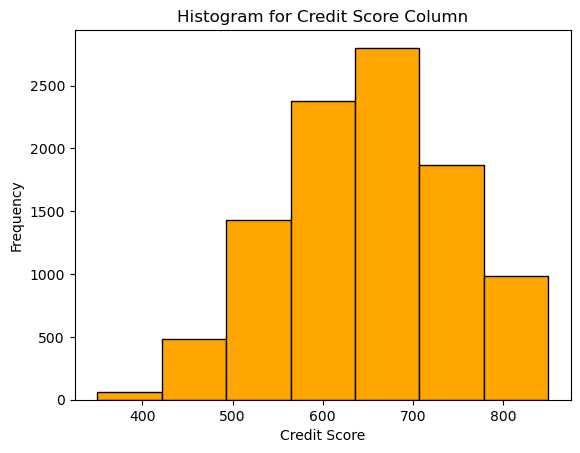

In [7]:
plt.hist(data_cs, bins=7, color='orange', edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Histogram for Credit Score Column')

In [8]:
#What are the respective mean values of these two features (use the pandas.DataFrame.mean() function)?
# For Age
mean_age = df['Age'].mean()
# For Credit Score
mean_creditscore = df['CreditScore'].mean()
print("The mean of the age feature:", mean_age)
print("The mean of the Creditscore feature:", mean_creditscore)

The mean of the age feature: 38.9218
The mean of the Creditscore feature: 650.5288


In [9]:
#What is the respective standard deviation of these two features (use the pandas.DataFrame.std() function)?
#For Age
sd_age = df['Age'].std()
#For Credit Score
sd_creditscore = df['CreditScore'].std()
print("The standard deviation of the age feature:", sd_age)
print("The standard deviation of the Creditscore feature:", sd_creditscore)

The standard deviation of the age feature: 10.487806451704591
The standard deviation of the Creditscore feature: 96.65329873613061


2. Only for this question use the dataframe consisting of the target variable (initialized as ‘df’). Using matplotlib visualize the number of males and females in each country who are active members and not active members. (Visualize this using a barchart. You will need to use the ‘Gender’, ‘Geography’ and ‘IsActiveMember’ features for this question). Visualize these graphs on two separate plots with respect to their active status. To create a barchart using matplotlib use the ‘matplotlib.pyplot.bar()’ function. Also label the x-axis, y-axis and give the plots a title. 

- How many males are from France and are active members?
- How many females are from Spain and are active members?
- How many males are from France or Germany who are not active members?

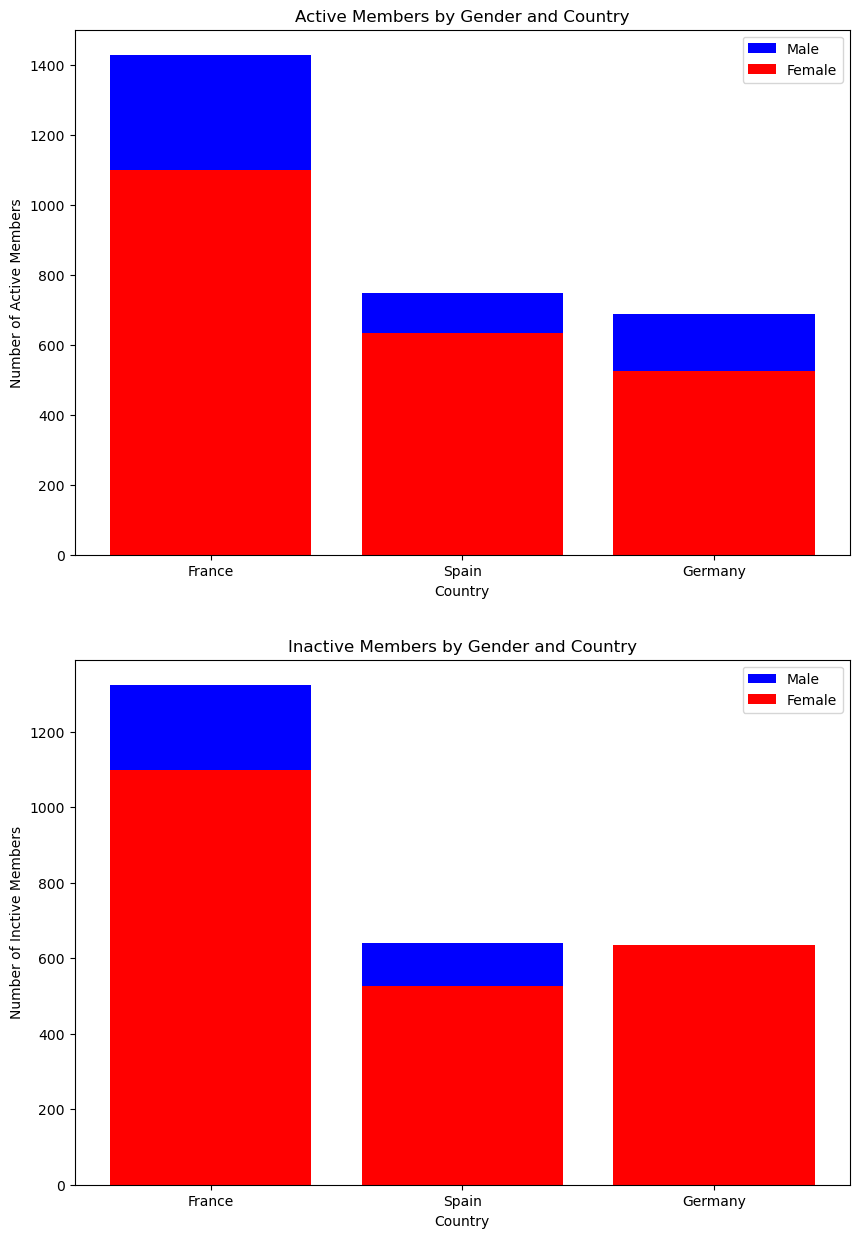

In [10]:
male_df = df[df['Gender'] == 'Male']
active_male = male_df[male_df['IsActiveMember'] == 1]['Geography'].value_counts()
inactive_male = male_df[male_df['IsActiveMember'] == 0]['Geography'].value_counts()

female_df = df[df['Gender'] == 'Female']
active_female = female_df[female_df['IsActiveMember'] == 1]['Geography'].value_counts()
inactive_female = female_df[female_df['IsActiveMember'] == 0]['Geography'].value_counts()

fig, axis = plt.subplots(2, 1, figsize=(10, 15))

axis[0].bar(active_male.index,active_male.values,color='blue',label='Male')
axis[0].bar(active_female.index,inactive_female.values,color='red',label='Female')
axis[0].set_xlabel('Country')
axis[0].set_ylabel('Number of Active Members')
axis[0].set_title('Active Members by Gender and Country')
axis[0].legend()

axis[1].bar(inactive_male.index,inactive_male.values,color='blue',label='Male')
axis[1].bar(inactive_female.index,inactive_female.values,color='red',label='Female')
axis[1].set_xlabel('Country')
axis[1].set_ylabel('Number of Inctive Members')
axis[1].set_title('Inactive Members by Gender and Country')
axis[1].legend()

3. Using the target variable in Y plot a bar chart showing the distribution of the ‘Exited’ column (To create a barchart using matplotlib use the ‘matplotlib.pyplot.bar()’ function). 

- What can be said about this distribution (specifically keeping in mind this distribution represents the target variable) will this have an impact on the results of the classification model? 

Text(0, 0.5, 'Values')

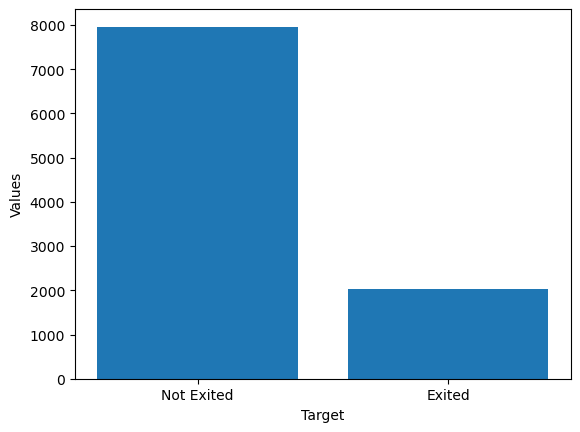

In [11]:
bar_chart = Y.value_counts()
plt.bar([0,1],bar_chart)
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.xlabel('Target')
plt.ylabel('Values')

4. So far you should have successfully been able to load, preprocess and visualize your data. Now, use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Gender’ and ‘Geography’).
**(Perform this only on X)**. 

- What is the shape of X?

In [12]:
X = pd.get_dummies(X,columns=['Gender','Geography'])

In [13]:
X.shape

(10000, 13)

### iii. Data Splitting
1. Split data into training and test sets using the sklearn ‘train_test_split() function in a **80:20** ratio. The result of your data split should be X_train, X_test, y_train, y_test. (Respectively your training features, testing features, training targets and testing target arrays).

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

### iv. Data Scaling
1. Employ the ‘MinMaxScaler’  function on the continuous attributes in X_train. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the training data (i.e., fit_transform() should be run on `X_train`). Store the result in X_train again. 


In [15]:
X_scale = MinMaxScaler()
continous_att = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
X_train[continous_att] = X_scale.fit_transform(X_train[continous_att])
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
7450,0.724,0.283784,0.5,0.650055,0.333333,1,1,0.118466,1,0,0,0,1
6975,0.412,0.270270,0.2,0.460199,0.000000,1,0,0.753412,0,1,0,0,1
3416,0.364,0.270270,0.9,0.000000,0.333333,0,0,0.152876,0,1,1,0,0
3718,0.436,0.162162,0.8,0.291171,0.333333,1,1,0.135015,0,1,1,0,0
5945,0.732,0.297297,0.3,0.000000,0.333333,0,1,0.838203,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,0.674,0.175676,0.3,0.000000,0.333333,0,0,0.241106,0,1,0,0,1
3041,0.642,0.216216,0.7,0.424889,0.333333,1,1,0.131893,0,1,1,0,0
5639,0.346,0.581081,0.8,0.264054,0.000000,1,1,0.109248,0,1,1,0,0
1732,0.770,0.418919,0.5,0.486147,0.000000,1,0,0.744035,0,1,1,0,0


2. Scale the X_test data using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, scaled according to the MinMaxScaler.

In [16]:
X_test[continous_att] = X_scale.transform(X_test[continous_att])
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
1547,0.606,0.162162,0.2,0.351710,0.333333,1,1,0.483280,1,0,0,0,1
4656,0.986,0.270270,0.8,0.537619,0.000000,1,1,0.053967,1,0,1,0,0
1951,0.508,0.472973,0.8,0.575747,0.000000,1,0,0.955028,0,1,1,0,0
5185,0.828,0.283784,0.9,0.551385,0.000000,1,0,0.250331,1,0,0,1,0
6151,0.754,0.175676,1.0,0.386600,0.333333,0,0,0.383049,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4709,0.408,0.175676,0.1,0.000000,0.333333,0,1,0.963337,0,1,1,0,0
2126,0.880,0.297297,0.9,0.000000,0.333333,1,1,0.353011,1,0,1,0,0
7774,1.000,0.337838,0.5,0.515369,0.333333,0,1,0.096174,0,1,0,1,0
3597,0.892,0.297297,0.1,0.397556,0.000000,1,0,0.887648,1,0,0,1,0


### c. Modelling
### i. Modeling (Model Instantiation / Training) using Logistic Regression classifier 
1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_1_lr’

In [17]:
model_1_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [18]:
model_1_lr.fit(X_train,y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [19]:
y_pred_lr = model_1_lr.predict(X_test)

4. Employ the ‘accuracy_score()’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model   

In [20]:
accuracy_lr = accuracy_score(y_test,y_pred_lr)
accuracy_lr

0.802

In [21]:
print("The accuracy of Logistic Regression Model is ",accuracy_lr*100,"%")

The accuracy of Logistic Regression Model is  80.2 %


### ii. Modeling (Model Instantiation / Training) using Support Vector Machine Classifier 

1. Employ the Support Vector Machine (SVM) classifier from sklearn and instantiate the model. Label this model as ‘model_2_svm’

In [22]:
model_2_svm = SVC()

2. Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

In [23]:
model_2_svm.fit(X_train,y_train)

SVC()

3. Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_svm’. 

In [24]:
y_pred_svm = model_2_svm.predict(X_test)

4. Employ the ‘accuracy_score’ function (‘sklearn.metrics.accuracy()’ function) by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the SVM model. 

In [25]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
accuracy_svm

0.8175

In [26]:
print("The accuracy of SVM Model is ",accuracy_svm*100,"%")

The accuracy of SVM Model is  81.75 %


### iii. Modeling Logistic Regression Classifier on a balanced dataset 
1. Employ Synthetic Minority Oversampling on X_train and y_train. To use SMOTE you will have to install the imbalanced-learn library, this can either be down by executing the following command ‘pip install -U imbalanced-learn’ command ‘conda install -c conda-forage imbalanced-learn’ command for the Anaconda Cloud platform. (For more information click the following link: https://imbalanced-learn.org/stable/install.html).  
Import the ‘SMOTE’ function from the ‘imblearn.over_sampling’. Use the ‘smote.refit_resample()’ function on X_train and y_train using its default parameters. Store them in X_train_smote, y_train_smote. - Be careful to employ SMOTE ONLY on the training data and not on the full dataset because that can cause inadvertent “data leakage” (please see: https://arxiv.org/pdf/2107.00079.pdf for details) . 

In [27]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [29]:
X_train_smote

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.724000,0.283784,0.500000,0.650055,0.333333,1,1,0.118466,1,0,0,0,1
1,0.412000,0.270270,0.200000,0.460199,0.000000,1,0,0.753412,0,1,0,0,1
2,0.364000,0.270270,0.900000,0.000000,0.333333,0,0,0.152876,0,1,1,0,0
3,0.436000,0.162162,0.800000,0.291171,0.333333,1,1,0.135015,0,1,1,0,0
4,0.732000,0.297297,0.300000,0.000000,0.333333,0,1,0.838203,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12761,0.566757,0.425404,0.338002,0.389908,0.000000,1,0,0.920327,0,1,0,1,0
12762,0.350314,0.275882,0.379237,0.045042,0.000000,1,0,0.584937,1,0,0,0,1
12763,0.494846,0.262761,0.400000,0.038542,0.666667,1,0,0.057944,1,0,1,0,0
12764,0.616646,0.364258,0.700000,0.146532,0.522740,1,0,0.295820,0,1,1,0,0


In [30]:
y_train_smote

0        0
1        0
2        0
3        0
4        0
        ..
12761    1
12762    1
12763    1
12764    1
12765    1
Name: Exited, Length: 12766, dtype: int64

2. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_3_smote_lr’

In [31]:
model_3_smote_lr = LogisticRegression()

3. Once instantiated, ‘fit()’ the model using the balanced X_train_smote, y_train_smote data.

In [32]:
model_3_smote_lr.fit(X_train_smote,y_train_smote)

LogisticRegression()

4. Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_smote_lr’. 

In [33]:
y_pred_smote_lr= model_3_smote_lr.predict(X_test)

5. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new Logistic Regression model.

- What is your initial observation of the accuracy of model_3_smote_lr vs. accuracy of model_1_lr? What could be the reasoning for (any possible) change in accuracy?

In [34]:
accuracy_smote_lr = accuracy_score(y_test,y_pred_smote_lr)
accuracy_smote_lr

0.72

In [35]:
print("The accuracy of LR Model is ",accuracy_smote_lr*100,"%")

The accuracy of LR Model is  72.0 %


### iv. Modeling SVM on a balanced dataset
1. Employ Synthetic Minority Oversampling on X_train and y_train. Import the ‘SMOTE’ function from the ‘imblearn.over_sampling’. Use the ‘smote.refit_resample()’ function on X_train and y_train. Store them in X_train_smote, y_train_smote. 

- At the end of this step, your new training set i.e., (X_train_smote , y_train_smote) should have the same number of instances for each of the two classes.

In [36]:
y_train_smote.value_counts()

0    6383
1    6383
Name: Exited, dtype: int64

2. Employ a new SVM classifier from sklearn and instantiate the model. Label this model as ‘model_4_smote_svm’

In [37]:
model_4_smote_svm = SVC()

3. Once instantiated, ‘fit()’ the model using the balanced X_train_smote, y_train_smote data.

In [38]:
model_4_smote_svm.fit(X_train_smote,y_train_smote)

SVC()

4. Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_smote_svm’.  

In [39]:
y_pred_smote_svm = model_4_smote_svm.predict(X_test)

5. Employ the ‘accuracy_score’ function (‘sklearn.metrics.accuracy()’ function) by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new SVM model. 

- What is your initial observation of the accuracy of model_4_smote_svm vs. accuracy of model_2_svm? What could be the reasoning for (any possible) change in accuracy? 

In [40]:
accuracy_smote_svm = accuracy_score(y_test,y_pred_smote_svm)
accuracy_smote_svm

0.7815

In [41]:
print("The accuracy of SVM Model is ",accuracy_smote_svm*100,"%")

The accuracy of SVM Model is  78.14999999999999 %


### Modeling Grid Search Parameter Selection for SVM 
1. We will now be reverting to our X_train and y_train data. Initialize a variable labeled as ‘param_grid’ storing the following: {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}.

In [42]:
param_grid =  {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}

2. Employ the gridsearchCV function and initialize the following parameters: estimator = SVC(), param_grid = param_grid, cv=5, verbose =1, scoring = ‘accuracy’

In [43]:
g = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv=5, verbose =1, scoring = 'accuracy')

3.  Once instantiated, ‘fit()’ the model using the X_train_smote, y_train_smote data.

In [44]:
g.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

4. Print the best paramaters using the **‘best_params_’** attribute and print the mean cross validated score of the best estimator (hint use the ‘best_score_’ attribute).

In [45]:
print("Best Parameters:")
print(g.best_params_)
print("Best Cross-validated Accuracy Score:")
print(g.best_score_)

Best Parameters:
{'C': 10000, 'gamma': 0.1}
Best Cross-validated Accuracy Score:
0.8249274196739383


5. Employ the ‘score’ function by using the ‘X_test’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new gridsearch SVM model.SVM model.

In [46]:
accuracy_smote_gsvm = g.score(X_test,y_test)
accuracy_smote_gsvm

0.785

In [47]:
print("The accuracy of the new gridsearch SVM Model is ",accuracy_smote_gsvm*100,"%")

The accuracy of the new gridsearch SVM Model is  78.5 %


### d. Evaluation
1. (2 points) Calculate F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test) .

- Employ the `classification_report()` function from sklearn.metrics to report the precision recall, f1 score and accuracy for each class for the first **four models (parts c.i – c.iv).**

In [48]:
print(accuracy_lr,accuracy_svm,accuracy_smote_lr,accuracy_smote_svm)

print('Classification Report for Logistic Regression Model')
print(classification_report(y_test, y_pred_lr))

print('Classification Report for SVM Model')
print(classification_report(y_test, y_pred_svm))

print('Classification Report for Logistic Regression on Balanced Dataset')
print(classification_report(y_test, y_pred_smote_lr))

print('Classification Report for SVM Model on Balanced Dataset')
print(classification_report(y_test, y_pred_smote_svm))

0.802 0.8175 0.72 0.7815
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1580
           1       0.58      0.20      0.30       420

    accuracy                           0.80      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.77      0.80      0.76      2000

Classification Report for SVM Model
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1580
           1       0.80      0.18      0.29       420

    accuracy                           0.82      2000
   macro avg       0.81      0.58      0.59      2000
weighted avg       0.81      0.82      0.77      2000

Classification Report for Logistic Regression on Balanced Dataset
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1580
           1       0.40      0.70      0.51       420

   

2. Visualize a confusion matrix for the first four models 

- Employ the `confusion_matrix()` function from sklearn.metrics to report the confusion matrix results.
- Report the False Negative and False Positive values for model_1_lr.

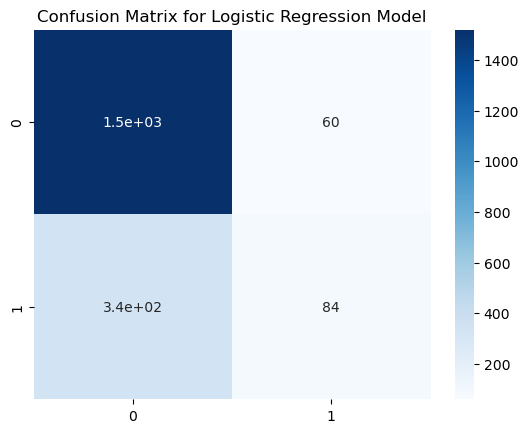

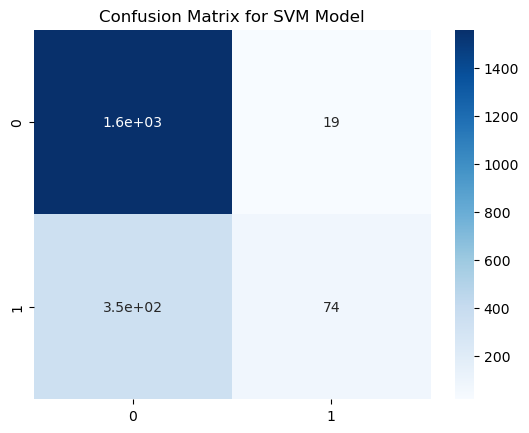

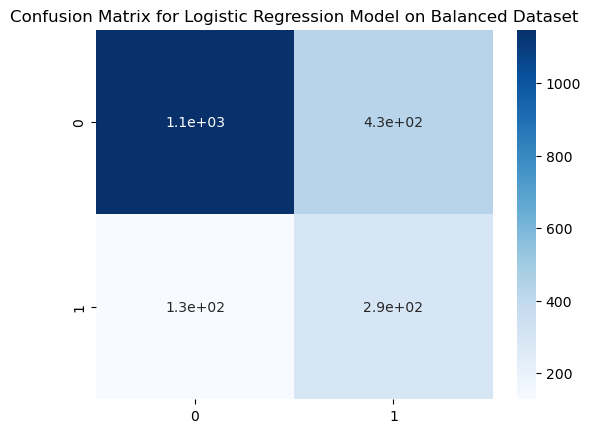

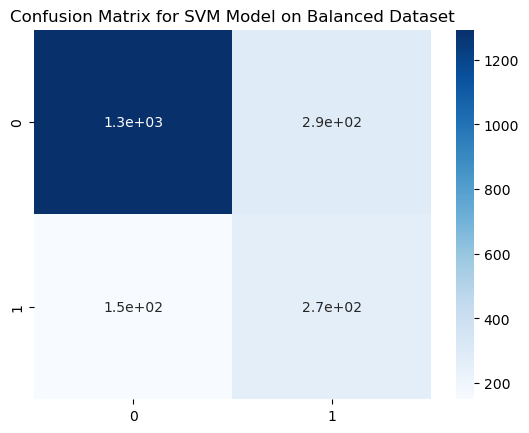

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confm_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

confm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confm_svm, annot=True, cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.show()

confm_lr_smote = confusion_matrix(y_test, y_pred_smote_lr)
sns.heatmap(confm_lr_smote, annot=True, cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model on Balanced Dataset')
plt.show()

confm_svm_smote = confusion_matrix(y_test, y_pred_smote_svm)
sns.heatmap(confm_svm_smote, annot=True, cmap='Blues')
plt.title('Confusion Matrix for SVM Model on Balanced Dataset')
plt.show()

In [50]:
#the False Negative and False Positive values for model_1_lr
tn, fp, fn, tp = confm_lr.ravel()
print(fp)
print(fn)

60
336


3. Report the best F1 score of the grid search implemented in the fifth model **(part c.v)**. Also report the best parameters from the grid search on the training set. 

In [51]:
from sklearn.metrics import make_scorer, f1_score
f1_scorer = make_scorer(f1_score)

best_f1_score = g.best_score_
best_params = g.best_params_

print(f"Best F1 Score: {best_f1_score}")
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best F1 Score: 0.8249274196739383
Best Parameters:
C: 10000
gamma: 0.1
